In [6]:
# Import basic data analysis and visualization libraries

import pandas as pd         # For data manipulation
import numpy as np          # For numerical operations
import seaborn as sns       # For easy plots + Titanic dataset
import matplotlib.pyplot as plt  # For charts

# Display plots inside the notebook itself
%matplotlib inline

# Set some simple visual style preferences
sns.set(style='whitegrid', font_scale=1.1)

print("✅ Libraries imported successfully!")


✅ Libraries imported successfully!


In [7]:

# Load the Titanic dataset directly from Seaborn
df = sns.load_dataset('titanic')

# Show the first 5 rows
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [8]:
# Number of rows and columns
print("Shape of dataset:", df.shape)

# Basic info about columns, datatypes, and missing values
df.info()


Shape of dataset: (891, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [9]:
# Statistical summary of numeric columns
df.describe()


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
df['sex'].value_counts()


sex
male      577
female    314
Name: count, dtype: int64

In [11]:
df['pclass'].value_counts()


pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [12]:
df['embarked'].value_counts()


embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [13]:
df.isnull().sum()   # confirm no missing values left


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [14]:
# Fill missing Age with median
df['age'].fillna(df['age'].median(), inplace=True)

# Fill missing Embarked and Embark_town with mode
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)

# Drop 'deck' column (too many missing)
df.drop('deck', axis=1, inplace=True)


C:\Users\Shan Sajeer\AppData\Local\Temp\ipykernel_21488\2608087963.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
C:\Users\Shan Sajeer\AppData\Local\Temp\ipykernel_21488\2608087963.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [15]:
df.fillna({
    'age': df['age'].median(),
    'embarked': df['embarked'].mode()[0],
    'embark_town': df['embark_town'].mode()[0]
}, inplace=True)

df.drop('deck', axis=1, inplace=True)


KeyError: "['deck'] not found in axis"

In [24]:
df.isnull().sum() 

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

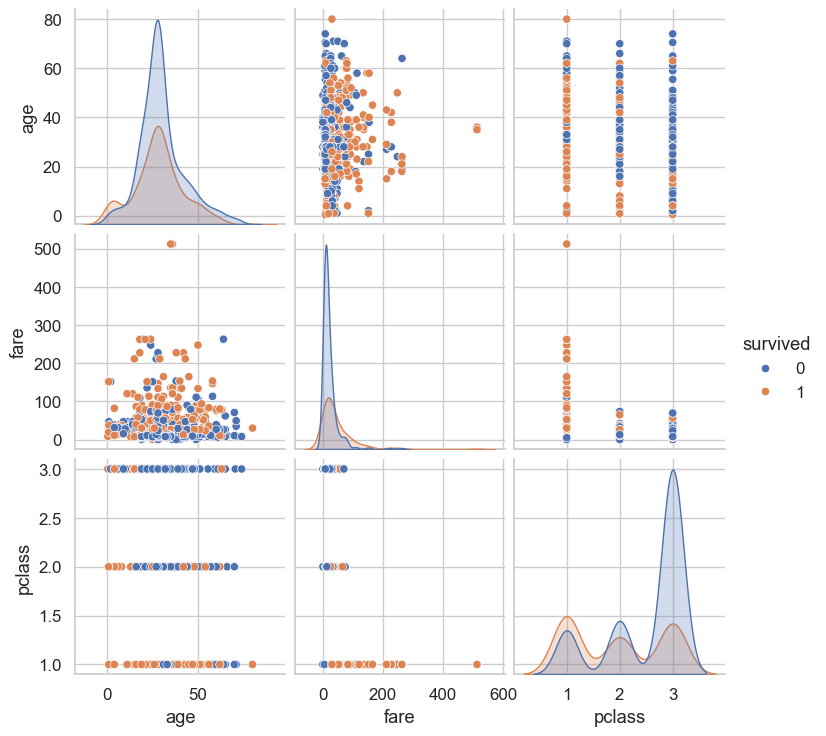

In [25]:
sns.pairplot(df[['age', 'fare', 'pclass', 'survived']], hue='survived')
plt.show()


-Survivors generally paid higher fares and were in 1st class.
-There’s no strong relation between age and survival directly.
-3rd-class passengers mostly did not survive

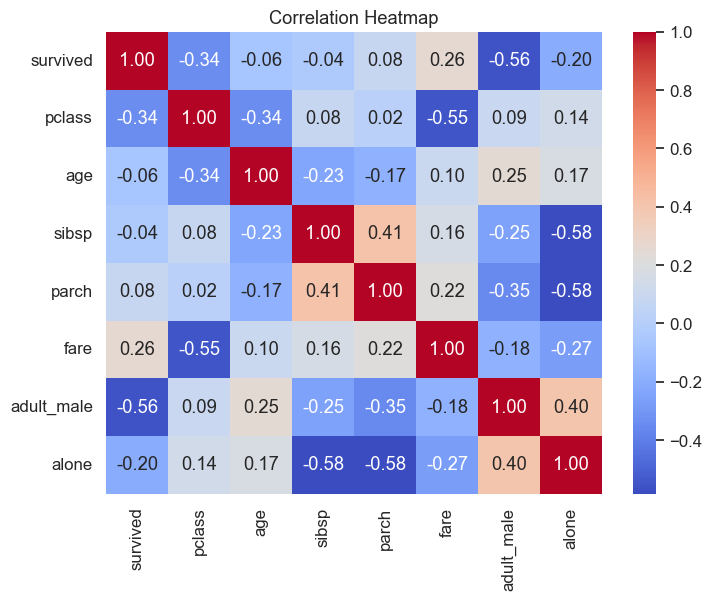

In [26]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


-Survival is positively correlated with fare (0.26) → higher fares increased survival chances.
-Survival is negatively correlated with class (-0.34) → higher class (1st class) passengers survived more.
-Adult males have a strong negative correlation (-0.56) with survival → fewer adult males survived.
-Siblings/spouses (sibsp) and parents/children (parch) show a moderate positive correlation (0.41) → families traveled together.

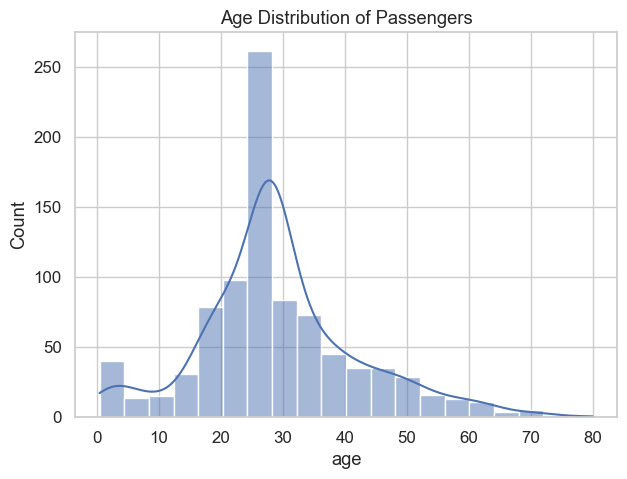

In [27]:
plt.figure(figsize=(7,5))
sns.histplot(df['age'], bins=20, kde=True)
plt.title("Age Distribution of Passengers")
plt.show()


-Most passengers were aged between 20–40 years.
-Very few children and elderly passengers were onboard.

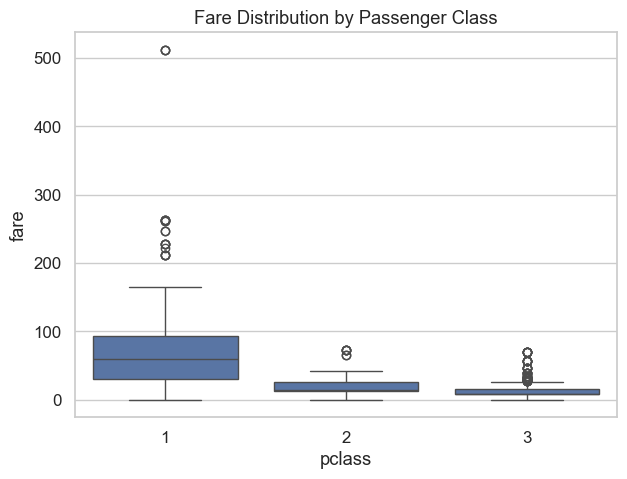

In [28]:
plt.figure(figsize=(7,5))
sns.boxplot(x='pclass', y='fare', data=df)
plt.title("Fare Distribution by Passenger Class")
plt.show()


-Passengers in 1st class paid significantly higher fares than those in 2nd or 3rd class.
-There are a few very high fare outliers in 1st class.

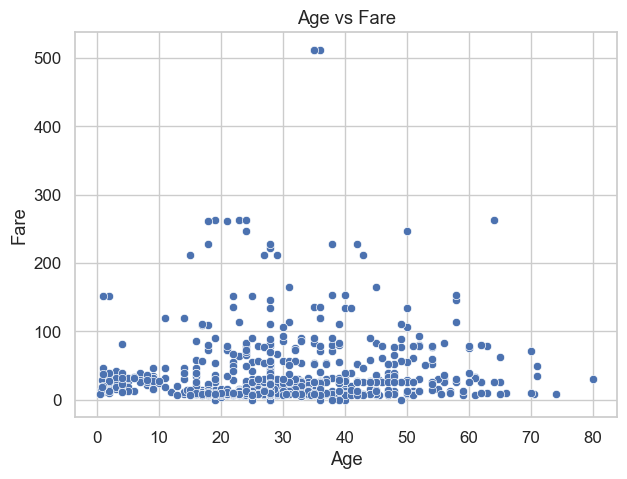

In [30]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='age', y='fare', data=df)
plt.title("Age vs Fare")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()


-There is no strong relationship between age and fare.
-Most passengers paid lower fares (below 100), regardless of age.

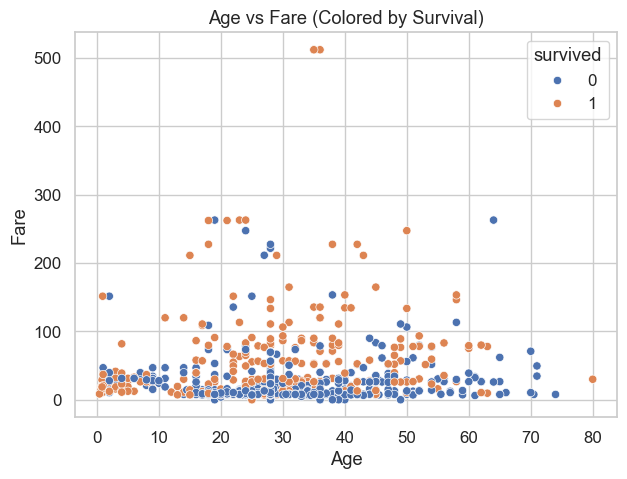

In [31]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='age', y='fare', hue='survived', data=df)
plt.title("Age vs Fare (Colored by Survival)")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()


-Survivors (colored points) are more concentrated at higher fares, especially for younger and middle-aged passengers.
Indicates that fare amount (and hence passenger class) influenced survival chances.

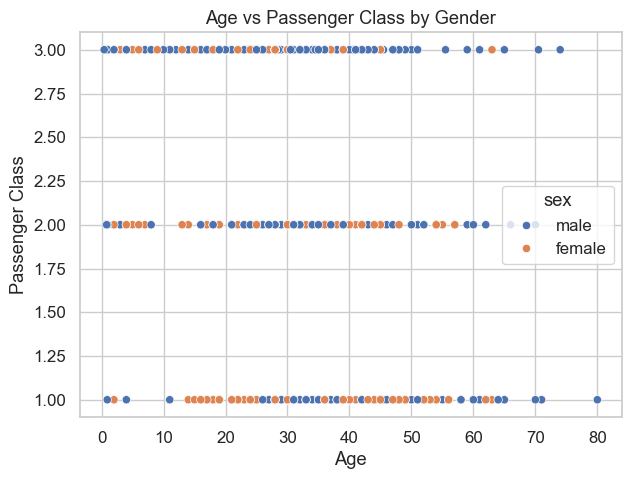

In [32]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='age', y='pclass', hue='sex', data=df)
plt.title("Age vs Passenger Class by Gender")
plt.xlabel("Age")
plt.ylabel("Passenger Class")
plt.show()


Female passengers were more common in higher classes (1st and 2nd).
Males are spread more evenly across all classes.